[('！', 103), ('？', 89), ('不', 62), ('人', 55), ('好', 48), ('_', 47), ('说', 46), ('李医生', 42), ('医生', 42), ('就', 37)]


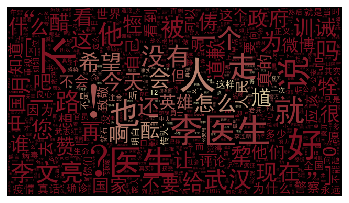

In [8]:
# 导入扩展库
import re # 正则表达式库
import collections # 词频统计库
import numpy as np # numpy数据处理库
import jieba # 结巴分词
import wordcloud # 词云展示库
from PIL import Image # 图像处理库
import matplotlib.pyplot as plt # 图像展示库

# 读取文件
fn = open('./InputTXT/Is0XboARR2.txt') # 打开文件
string_data = fn.read() # 读出整个文件
fn.close() # 关闭文件

# 文本预处理
pattern = re.compile(u'\t|\n|\.|-|:|;|\)|\(|\?|"') # 定义正则表达式匹配模式
string_data = re.sub(pattern, '', string_data) # 将符合模式的字符去除

# 文本分词
seg_list_exact = jieba.cut(string_data, cut_all = False) # 精确模式分词
object_list = []
remove_words = [u'的', u'，',u'和', u'是', u'随着', u'对于', u'对',u'等',u'能',u'都',u'。',u' ',u'、',u'中',u'在',u'了',u'通常',u'如果',u'我们',u'需要',u'回复',u'@',u'我',u'你',u'? ', u'有'] # 自定义去除词库

for word in seg_list_exact: # 循环读出每个分词
    if word not in remove_words: # 如果不在去除词库中
        object_list.append(word) # 分词追加到列表

# 词频统计
word_counts = collections.Counter(object_list) # 对分词做词频统计
word_counts_top10 = word_counts.most_common(10) # 获取前10最高频的词
print (word_counts_top10) # 输出检查

# 词频展示
mask = np.array(Image.open('./background/wordcloud.jpeg')) # 定义词频背景
wc = wordcloud.WordCloud(
    font_path='./background/simhei.ttf', # 设置字体格式
    mask=mask, # 设置背景图
    max_words=1000, # 最多显示词数
    max_font_size=100 # 字体最大值
)

wc.generate_from_frequencies(word_counts) # 从字典生成词云
image_colors = wordcloud.ImageColorGenerator(mask) # 从背景图建立颜色方案
wc.recolor(color_func=image_colors) # 将词云颜色设置为背景图方案
plt.imshow(wc) # 显示词云
plt.axis('off') # 关闭坐标轴
plt.savefig('outcloud.png', dpi = 250)
plt.show() # 显示图像
